In [1]:
from scipy import stats

In [2]:
stats.norm.cdf(680,711,29)

0.14254260383881612

In [3]:
1 - stats.norm.cdf(750,711,29)

0.08934045974656879

In [4]:
stats.norm.cdf(740,711,29)

0.8413447460685429

In [5]:
0.8413447460685429 - 0.14254260383881612

0.6988021422297268

In [6]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
beml_df = pd.read_csv("BEML.csv")
beml_df.head()

In [ ]:
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df.head()

In [9]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [ ]:
beml_df

In [ ]:
glaxo_df

In [12]:
beml_df.dtypes

Date      object
Close    float64
dtype: object

In [13]:
glaxo_df.dtypes

Date      object
Close    float64
dtype: object

In [14]:
# '''The DataFrames have a date column, so we can
# create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
# ascending order.'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [ ]:
beml_df.head() # now date col is acting as an index

In [ ]:
glaxo_df.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')

In [ ]:
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Close')

In [19]:
# Gain is for each day. We are assuming that gain is coming from normal distribution.
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [ ]:
glaxo_df

In [ ]:
beml_df

In [22]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

In [ ]:
glaxo_df

In [ ]:
beml_df

In [ ]:
# GLAXO: Plot the gains. Over the years gain is not changing much.
# In 2014 gain was highest i.e.20% and highest loss upto 7%. Sometimes positive sometimes negative
plt.figure(figsize = (8, 5))
plt.plot(glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')

In [ ]:
# BEML: from 2010 to 2012 gain was on lower side and after that gain increased upto 2015
plt.figure(figsize = (8, 5))
plt.plot(beml_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('Distribution',fontsize=15)
plt.subplot(1,2,1)
sn.distplot(glaxo_df.gain, label = 'Glaxo')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()
plt.subplot(1,2,2)
sn.distplot(beml_df.gain, label = 'BEML')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

#bell shaped normal distribution

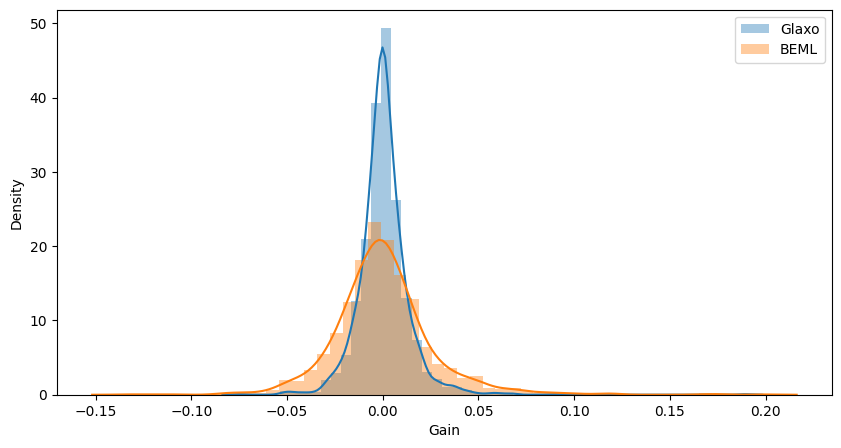

In [30]:
plt.figure(figsize=(10,5))
sn.distplot(glaxo_df.gain, label = 'Glaxo')
sn.distplot(beml_df.gain, label = 'BEML')
plt.xlabel('Gain')
plt.ylabel('Density')
plt.legend()
# for BEML there is more variance (high risk or volatality) than GLAXO

In [ ]:

print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [ ]:
print('Mean: ', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))
# BEML has high std

Mean:  0.0003
Standard Deviation:  0.0264


In [ ]:
from scipy import stats
# import scipy
#Probability of making 2% loss or higher loss in Glaxo - left of 0 i.e.e -0.02
stats.norm.cdf(-0.02,0.0004, 0.0134) # norm.cdf(0.02,mean,std)
#loc=glaxo_df.gain.mean(),
#scale=glaxo_df.gain.std()) # there are 6% of chances having 2% or higher loss

0.06395593743937553

# **norm.cdf() and norm.ppf() function difference**

In [ ]:
# To understand difference between cdf() and ppf() execute below code.
# (Cumulative Distribution Function): norm.cdf(normal distribution value, loc, scale): calculates probability for a given normal distribution value.
# (Percent Point Function): norm.ppf(probability,loc,scale): calculates normal distribution value for a given probability.
stats.norm.ppf(0.06395593743937553,0.0004, 0.0134) # output of above command,loc,scale

-0.02

In [ ]:
#Probability of making 2% gain or higher gain in Glaxo - to the right of 0.02
1 - stats.norm.cdf(0.02,0.0004, 0.0134) # 7% chances of having at least 2% or higher gain, Glaxo seems safer than BEML

0.07177658173190637

### Inclass Exercise

### Compute 2% loss or gain for BEML
Chances of profit or loss are high with BEML than GLAXO

In [ ]:
stats.norm.cdf( -0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22155987503755292

In [ ]:
#Probability of making 2% gain or higher in BEML
1 - stats.norm.cdf(0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22769829484075355

In [ ]:
from scipy import stats
stats.norm.cdf(1.65,0,1) # Cumulative Distribution Function - Calculates probability for a given normal distribution value

0.9505285319663519

In [ ]:
stats.norm.ppf(0.95,0,1) # Percent Point Funcion - Calculates normal distribution value for which a given probability is thge required value.
                         # cdf() and ppf() are inverse of each other.

1.6448536269514722

In [ ]:
glaxo_df_ci = stats.norm.interval(0.95,
loc = glaxo_df.gain.mean(),
scale = glaxo_df.gain.std())
print( 'Mean at 95% confidence interval is:', np.round(glaxo_df_ci, 4))

Mean at 95% confidence interval is: [-0.0258  0.0266]


In [ ]:
beml_df_ci =stats.t.interval(0.95,loc=beml_df.gain.mean(),scale=beml_df.gain.std(),df=1737)
print( 'Mean at 95% confidence interval is:', np.round(beml_df_ci, 4))

Mean at 95% confidence interval is: [-0.0516  0.0521]
